## Data wrangling

is a proces of `cleaning` `transforming`,`organizing`,data so that it can b use for `anlysis` and `visulazation` . it is an important step in data analyis process because raw data is often `incomplet` ,`inconistant`,and in `unstructured` structure formate which can make dfficult to work with.

Data wrangling help to make the  data more `consistent` `accurate` and `useful` for analsis and dessicion making

## Steps of clening data
1. Gathering data(kia clean rna ha)  libaries
2. Tool to clean data(kis sa cleen krna ha)    Libraries
3. How to do(kasy cln krna ha )  include step

In [2]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'pandas'

In [5]:
df = sns.load_dataset('titanic')

NameError: name 'sns' is not defined

In [4]:
df.head()

NameError: name 'df' is not defined

In [3]:
df.describe()

NameError: name 'df' is not defined

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
df.isnull().sum()/len(df)*100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [ ]:
df.drop(columns='deck',inplace=True)

In [ ]:
# replace the null value of age with mean of age
# deal null value with mean median mode
df['age'] = df.age.fillna(df['age'].mean(),)

In [ ]:
# 
df['embarked'] = df.embarked.fillna(value =df['embarked'].mode()[0])

In [ ]:
df['embark_town'] = df.embark_town.fillna(value =df['embark_town'].mode()[0])

In [ ]:
df.isnull().sum()/len(df)*100

survived       0.0
pclass         0.0
sex            0.0
age            0.0
sibsp          0.0
parch          0.0
fare           0.0
embarked       0.0
class          0.0
who            0.0
adult_male     0.0
embark_town    0.0
alive          0.0
alone          0.0
dtype: float64

# Outlier Removal

# Visualization wala method

<Axes: xlabel='sex', ylabel='age'>

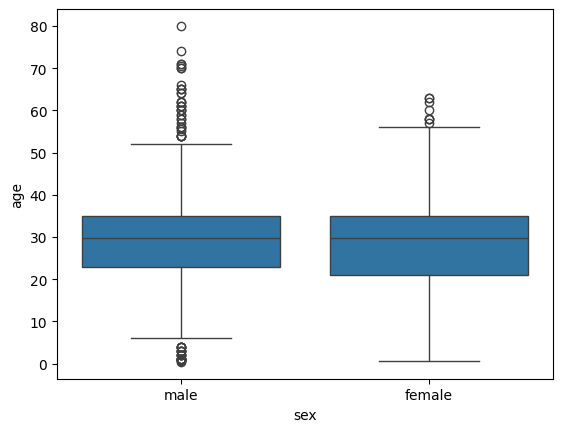

In [ ]:
import seaborn as sns 

sns.boxplot(data=df,y='age',x='sex')
# jo b line sa uper han sary outlier han

In [ ]:
# IQR method
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
IQR

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
df = df[(df['age'] > lower_bound) & (df['age'] < upper_bound)]



In [ ]:
df.shape
# 66 outlier remove

(825, 14)

In [ ]:
# IQR method
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1
IQR

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
df = df[(df['fare'] > lower_bound) & (df['fare'] < upper_bound)]

In [ ]:
df.shape
#107 outlier rem0ve ho ge han

(718, 14)

In [ ]:
# Z_Score
! pip install scipy

# from scipy import ststs

Defaulting to user installation because normal site-packages is not writeable


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: C:\Users\3 com\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
# from scipy import stats
# import numpy as np

# zscore = np.abs(stats.zscore(df['age']))
# thershold = 3 
# df = df [(z < thershold).all(axix=1)]   # explain with cht gpt   

# Finding and droping dublicat



In [ ]:
df.shape

(718, 14)

In [ ]:
# Finding an droping dublicate

#finding dublicate

df.duplicated().sum()


103

In [ ]:
#Droping
df.drop_duplicates(inplace=True)

In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,Southampton,no,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,Southampton,no,True
5,0,3,male,29.699118,0,0,8.4583,Q,Third,man,True,Queenstown,no,True


In [ ]:
df.shape

(615, 14)

#### Duplicate remove honay ka bad data clean ho gyaha ab ham na data ko transform krna ha

## Data Normalization

###### TO bring data in one scale

In [ ]:
#1 import libararies
# pip install sckit-learn

import pandas as pd
from sklearn.preprocessing import MinMaxScaler

#2 data
df

#3 slect colum to normalize
col_to_normalize = ['age','fare']

#4 creat the scaler function tool
scaler = MinMaxScaler()

#5 fit aand transform the data on scaler
df[col_to_normalize] =scaler.fit_transform(df[col_to_normalize])

#6 check the data 
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,0.372549,1,0,0.118118,S,Third,man,True,Southampton,no,False
2,1,3,female,0.450980,0,0,0.129115,S,Third,woman,False,Southampton,yes,True
3,1,1,female,0.627451,1,0,0.865114,S,First,woman,False,Southampton,yes,False
4,0,3,male,0.627451,0,0,0.131152,S,Third,man,True,Southampton,no,True
5,0,3,male,0.523512,0,0,0.137804,Q,Third,man,True,Queenstown,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,0.705882,0,5,0.474509,Q,Third,woman,False,Queenstown,no,False
887,1,1,female,0.313725,0,0,0.488765,S,First,woman,False,Southampton,yes,True
888,0,3,female,0.523512,1,2,0.382051,S,Third,woman,False,Southampton,no,False
889,1,1,male,0.450980,0,0,0.488765,C,First,man,True,Cherbourg,yes,True


In [ ]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000
mean,0.360976,2.469919,0.497584,0.460163,0.365854,0.298831
std,0.480674,0.741063,0.209485,0.894039,0.835572,0.221334
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.372549,0.000000,0.000000,0.128640
50%,0.000000,3.000000,0.523512,0.000000,0.000000,0.211798
75%,1.000000,3.000000,0.607843,1.000000,0.000000,0.423596
max,1.000000,3.000000,1.000000,5.000000,6.000000,1.000000


In [ ]:
# age ka scale 80 sa transform ho ka 0 ur 1 ka andara aya ge sary vlue
# 0 sa 80 ka scale 60ur ka 1 ka adopt kar lia ha 

In [ ]:
# Aur agr hm na yahe kam standard scaler pa karna ho to

#1 import libararies
# pip install sckit-learn

import pandas as pd
from sklearn.preprocessing import StandardScaler

#2 data
df

#3 slect colum to normalize
col_to_normalize = ['age','fare']

#4 creat the scaler function tool
scaler = StandardScaler()

#5 fit aand transform the data on scaler
df[col_to_normalize] =scaler.fit_transform(df[col_to_normalize])

#6 check the data 
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,-0.597354,1,0,-0.817136,S,Third,man,True,Southampton,no,False
2,1,3,female,-0.222648,0,0,-0.767410,S,Third,woman,False,Southampton,yes,True
3,1,1,female,0.620441,1,0,2.560585,S,First,woman,False,Southampton,yes,False
4,0,3,male,0.620441,0,0,-0.758201,S,Third,man,True,Southampton,no,True
5,0,3,male,0.123872,0,0,-0.728122,Q,Third,man,True,Queenstown,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,0.995147,0,5,0.794372,Q,Third,woman,False,Queenstown,no,False
887,1,1,female,-0.878384,0,0,0.858832,S,First,woman,False,Southampton,yes,True
888,0,3,female,0.123872,1,2,0.376301,S,Third,woman,False,Southampton,no,False
889,1,1,male,-0.222648,0,0,0.858832,C,First,man,True,Cherbourg,yes,True


In [ ]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,615.000000,615.000000,6.150000e+02,615.000000,615.000000,6.150000e+02
mean,0.360976,2.469919,3.061688e-16,0.460163,0.365854,-1.213122e-16
std,0.480674,0.741063,1.000814e+00,0.894039,0.835572,1.000814e+00
min,0.000000,1.000000,-2.377209e+00,0.000000,0.000000,-1.351236e+00
25%,0.000000,2.000000,-5.973545e-01,0.000000,0.000000,-7.695610e-01
50%,0.000000,3.000000,1.238725e-01,0.000000,0.000000,-3.935399e-01
75%,1.000000,3.000000,5.267644e-01,1.000000,0.000000,5.641565e-01
max,1.000000,3.000000,2.400296e+00,5.000000,6.000000,3.170505e+00



x_stand = (x-mean(x))/std(x)

where

x_stand is the standarized variable
x is orginal varabile
mean(x) is a mean of varabile x
std(x) is the standard devation of variable x_stand

### Log Transformation


In [ ]:
kashti = sns.load_dataset('titanic')
kashti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
kashti.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# outlier ko remove karny sa phaly ham log transformation karty ha

import numpy as np

kashti['age'] = kashti['age'].fillna(kashti['age'].median())
kashti['fare'] = kashti['fare'].fillna(kashti['fare'].median())

# log transform 

kashti['age'] =  np.log(kashti["age"])
kashti['fare'] =  np.log(kashti["fare"])

kashti.head()
# log lany s value 6outy scle ma aya jati han

C:\Users\3 com\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,3.091042,1,0,1.981001,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,3.637586,1,0,4.266662,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,3.258097,0,0,2.070022,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,3.555348,1,0,3.972177,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,3.555348,0,0,2.085672,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# agar 0 ka qreeb value zayada han to t ham 'np.log1p'laty

<Axes: xlabel='sex', ylabel='age'>

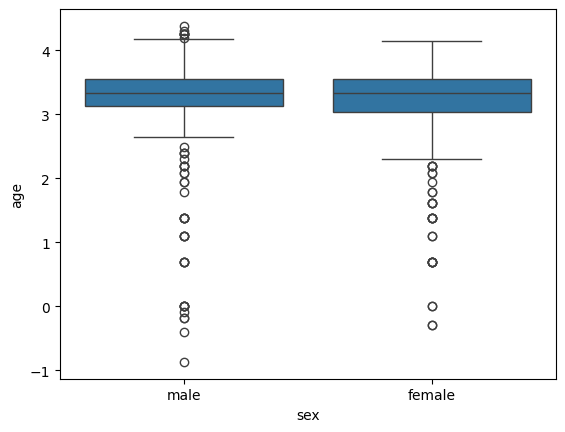

In [ ]:
sns.boxplot(data = kashti,x='sex',y='age')

<Axes: xlabel='sex', ylabel='fare'>

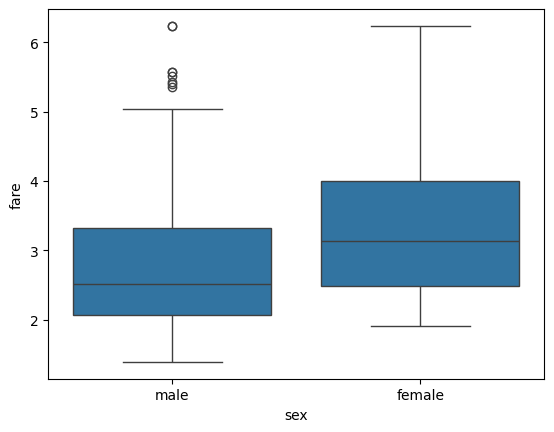

In [ ]:
#age ke jaga fare pa banaty han
sns.boxplot(data = kashti,x='sex',y='fare')  # fare sa outlier remove ho ga han normaliiztion ke waja sa

<Axes: xlabel='age', ylabel='Count'>

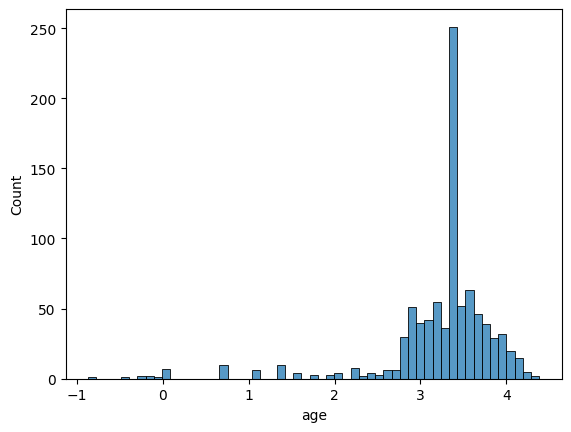

In [ ]:
sns.histplot(kashti['age'])

In [ ]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

# orgnazing the data

In [ ]:
df['family_size'] = df['sibsp']+df['parch']
# is code sa ak colum add ho gya data ma


<Axes: xlabel='family_size', ylabel='Count'>

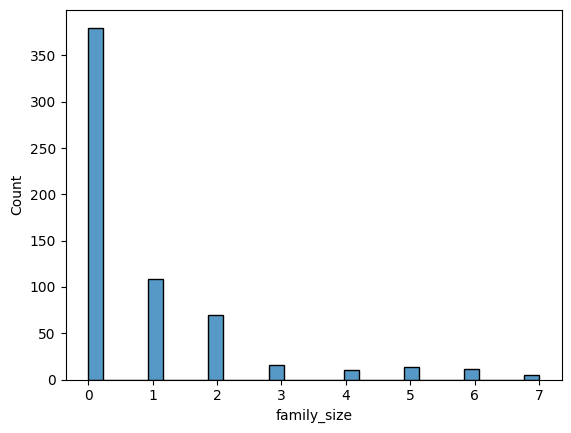

In [ ]:
sns.histplot(df['family_size'])

C:\Users\3 com\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\categorical.py:3370: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='sex', ylabel='age'>

C:\Users\3 com\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\categorical.py:3370: UserWarning: 12.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\3 com\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\categorical.py:3370: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


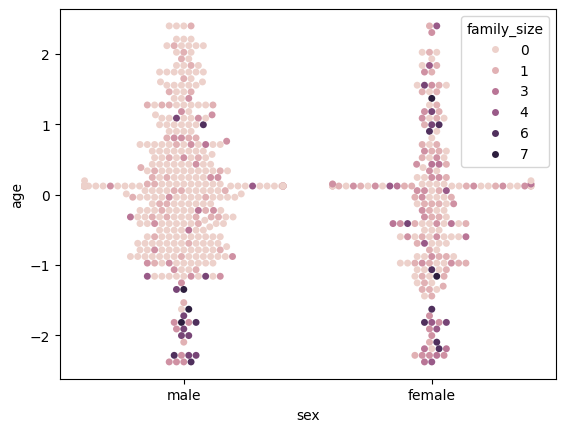

In [ ]:
# swarm plot

sns.swarmplot(data=df ,x='sex',y='age',hue="family_size")

In [ ]:
df =df.rename(columns={'survived': 'survival'})
df.columns

# is code sa  hm na col name change kia haw

Index(['survival', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone', 'family_size'],
      dtype='object')

In [ ]:
table = pd.pivot.table(df,value='fare',index='pclass',
    columns = "survival",aggfunc=np.mean)
table

AttributeError: 'function' object has no attribute 'table'

<Axes: xlabel='fare', ylabel='age'>

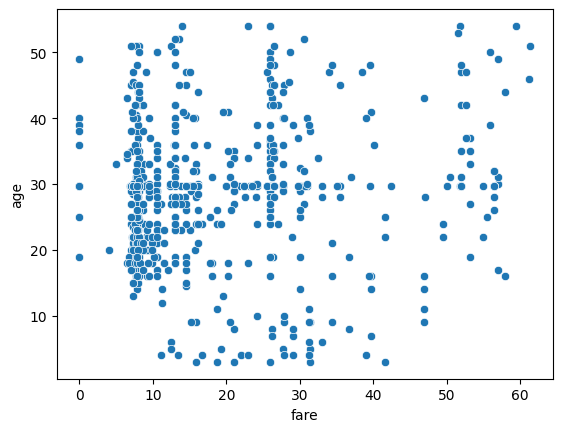

In [ ]:
sns.scatterplot(data=df,x='fare',y='age')

In [ ]:
df['family_size'] = df['sibsp']+df['parch']

In [ ]:
#final data dakhty han data wrangling apply karny ka bad

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,family_size
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,Southampton,no,False,1
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,0
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,Southampton,yes,False,1
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,Southampton,no,True,0
5,0,3,male,29.699118,0,0,8.4583,Q,Third,man,True,Queenstown,no,True,0


## Saving the wrangled data

In [114]:
# csv jaga b km lata a ur ha b poerfull excal sa
df.to_csv("preprocessed_data.csv")